In [1]:
import math
from numpy import linspace
from numpy.random import normal, rand
import matplotlib.pyplot as plt

##Часть 1

* Распределение Пуассона
* Распределение Гаусса

In [4]:
def Puasson(a):
  k=5
  return a**k/math.factorial(k)*math.e**(-a)

In [5]:
def Gauss(u):
  o=2
  return math.e**(-(math.pi-u)**2/(2*o**2))/(o*math.sqrt(2*math.pi))

##Часть 2
Rejection sampling

In [6]:
def RejectionSampling(N,f,a,b,c):
  '''
  N - количество точек 
  f - функция
  a - начало отрезка 
  b - конец отрезка 
  c - высота
  '''
  X = []
  Y = []
  False_X = []
  False_Y = []
  while len(X)<N:
    x = rand() * (b-a) + a
    y = rand() * c
    if y < f(x):
      X.append(x)
      Y.append(y)
    else:
      False_X.append(x)
      False_Y.append(y)
  return X,Y,False_X,False_Y

График

In [23]:
def RSPlot(N,f,a,b,c):
  '''
  N - количество точек 
  f - функция
  a - начало отрезка 
  b - конец отрезка 
  c - высота
  '''
  xs = linspace(a, b, N)
  ys = f(xs)
  X,Y,False_X,False_Y = RejectionSampling(N,f,a,b,c)
  plt.hist(X, 50, density=True,color="green")
  plt.plot(xs, ys,color = "red")
  plt.scatter(X, Y, s=1,color = "red")
  plt.scatter(False_X, False_Y, s=1, color = "blue")
  plt.xlabel("X"), plt.ylabel("Y"), plt.xlim(a,b), plt.ylim(0, c)
  plt.show()

Тест

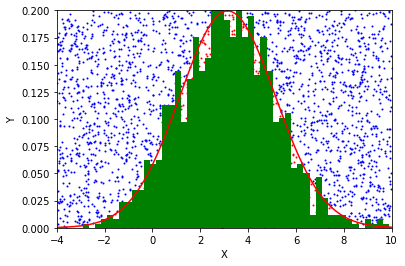

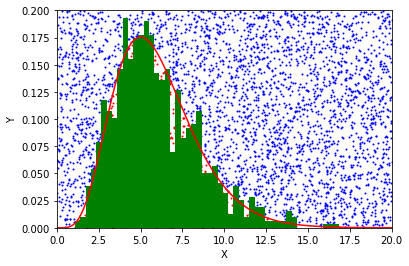

In [24]:
RSPlot(1000, Gauss, -4, 10, 0.20)
RSPlot(1000, Puasson, 0, 20, 0.20)

##Часть 3
Metropolis hastings

In [13]:
def MetropolisHastings(N,x0,f):
  '''
  N - количество точек
  x0 - начальная точка
  f - функция
  '''
  X = [x0]
  while len(X) < N:
    x_old = X[-1]
    x_new = normal(x_old)
    a = f(x_new)/f(x_old)
    if rand() < a:
      X.append(x_new)
    else:
      X.append(x_old)
  return X

График

In [15]:
def MHPlot(N,x0,f,a,b,c):
  '''
  N - количество точек 
  x0 - начальная точка
  f - функция
  a - начало отрезка 
  b - конец отрезка 
  c - высота
  '''
  X = MetropolisHastings(N,x0,f)
  xs = linspace(a, b, 100)
  ys = f(xs)
  plt.plot(xs, ys,color = "red")
  plt.hist(X, 50, density=True,color="green")
  plt.xlabel("x"), plt.ylabel("y"), plt.xlim(a,b), plt.ylim(0, c)
  plt.grid(True)
  plt.show()

Тест

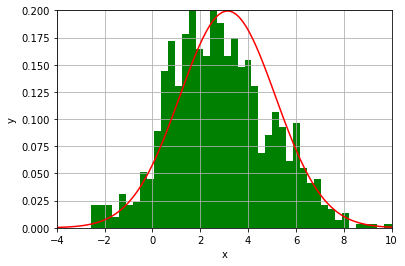

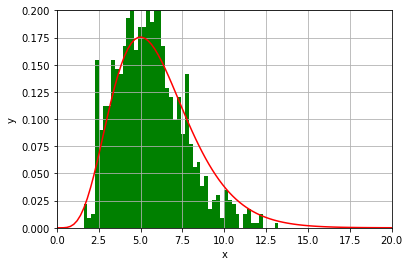

In [16]:
MHPlot(1000, 1, Gauss, -4, 10, 0.20)
MHPlot(1000, 3, Puasson, 0, 20, 0.20)